<a href="https://colab.research.google.com/github/likhithakarnati/obese-detector/blob/main/weightpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/diazoniclabs/Microland/main/knn.csv')
df

,Weight(x2)kg,Height(y2)cm,Class
0,51kg,167cm,Underweight
1,66kg,177cm,Normal
2,75kg,169cm,Overweight
3,69kg,176cm,Normal
4,50kg,173cm,Underweight
5,82kg,170cm,Overweight
6,65kg,172cm,Normal
7,58kg,180cm,Underweight
8,68kg,162cm,Overweight
9,63kg,165cm,Normal


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     object
 1   Height(y2)cm  25 non-null     object
 2   Class         25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


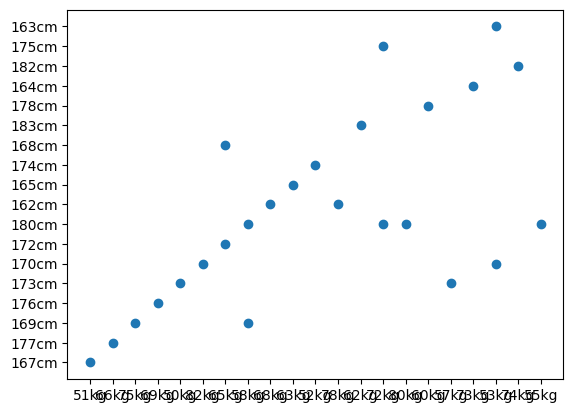

In [6]:
plt.scatter(df['Weight(x2)kg'],df['Height(y2)cm'])

In [7]:
df['Weight(x2)kg'][0]

'51kg'

In [8]:
df['Weight(x2)kg'][0][:-2]

'51'

In [9]:
df['Weight(x2)kg'].apply(lambda x:x[:-2])

0     51
1     66
2     75
3     69
4     50
5     82
6     65
7     58
8     68
9     63
10    52
11    58
12    78
13    65
14    62
15    72
16    80
17    60
18    57
19    73
20    53
21    74
22    72
23    53
24    55
Name: Weight(x2)kg, dtype: object

In [10]:
df['Weight(x2)kg']=df['Weight(x2)kg'].apply(lambda x:x[:-2]).astype(int)

In [11]:
df['Height(y2)cm'].apply(lambda x:x[:-2])

0     167
1     177
2     169
3     176
4     173
5     170
6     172
7     180
8     162
9     165
10    174
11    169
12    162
13    168
14    183
15    180
16    180
17    178
18    173
19    164
20    170
21    182
22    175
23    163
24    180
Name: Height(y2)cm, dtype: object

In [12]:
df['Height(y2)cm']=df['Height(y2)cm'].apply(lambda x:x[:-2]).astype(int)

In [13]:
df['Height(y2)cm']

0     167
1     177
2     169
3     176
4     173
5     170
6     172
7     180
8     162
9     165
10    174
11    169
12    162
13    168
14    183
15    180
16    180
17    178
18    173
19    164
20    170
21    182
22    175
23    163
24    180
Name: Height(y2)cm, dtype: int64

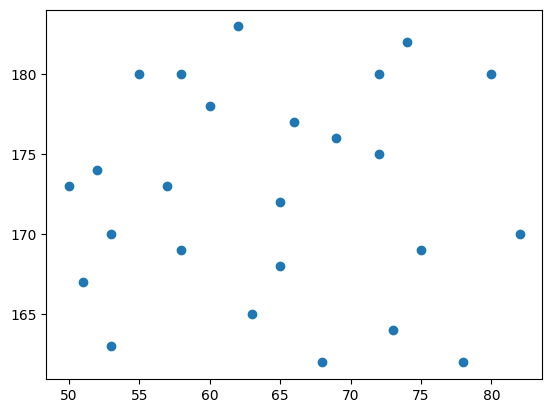

In [14]:
plt.scatter(df['Weight(x2)kg'],df['Height(y2)cm'])

In [15]:
u = df['Class'].unique()
u

array(['Underweight', 'Normal', 'Overweight'], dtype=object)

In [16]:
#create 3 sub dataframe
df['Class'] == u[0]

0      True
1     False
2     False
3     False
4      True
5     False
6     False
7      True
8     False
9     False
10     True
11    False
12    False
13    False
14     True
15    False
16    False
17     True
18    False
19    False
20     True
21    False
22    False
23    False
24     True
Name: Class, dtype: bool

In [17]:
df[df['Class'] == u[0]]

,Weight(x2)kg,Height(y2)cm,Class
0,51,167,Underweight
4,50,173,Underweight
7,58,180,Underweight
10,52,174,Underweight
14,62,183,Underweight
17,60,178,Underweight
20,53,170,Underweight
24,55,180,Underweight


In [18]:
df[df['Class'] == u[1]]

,Weight(x2)kg,Height(y2)cm,Class
1,66,177,Normal
3,69,176,Normal
6,65,172,Normal
9,63,165,Normal
11,58,169,Normal
13,65,168,Normal
15,72,180,Normal
18,57,173,Normal
21,74,182,Normal
23,53,163,Normal


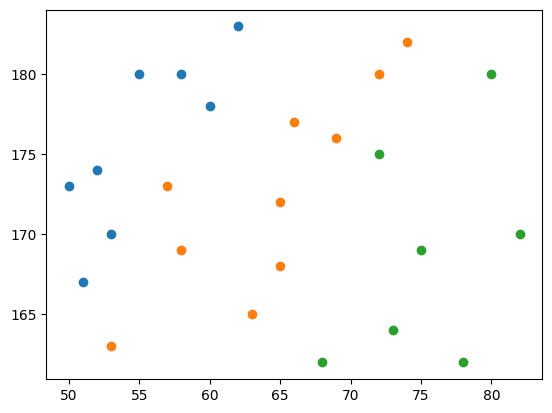

In [19]:
u_df = df[df['Class'] == u[0]]
n_df = df[df['Class'] == u[1]]
o_df = df[df['Class'] == u[2]]

plt.scatter(u_df['Weight(x2)kg'],u_df['Height(y2)cm'])

plt.scatter(n_df['Weight(x2)kg'],n_df['Height(y2)cm'])

plt.scatter(o_df['Weight(x2)kg'],o_df['Height(y2)cm'])

plt.show()

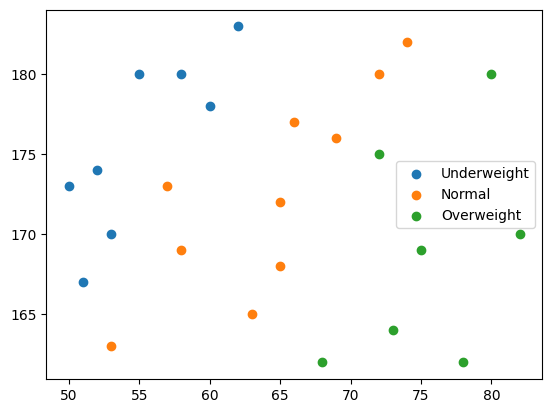

In [20]:
u_df = df[df['Class'] == u[0]]
n_df = df[df['Class'] == u[1]]
o_df = df[df['Class'] == u[2]]

plt.scatter(u_df['Weight(x2)kg'],u_df['Height(y2)cm'],label=u[0])

plt.scatter(n_df['Weight(x2)kg'],n_df['Height(y2)cm'],label=u[1])

plt.scatter(o_df['Weight(x2)kg'],o_df['Height(y2)cm'],label=u[2])
plt.legend()
plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0) #calling for decision tree

In [22]:
x = df[['Weight(x2)kg','Height(y2)cm']]
y = df['Class']

In [23]:
clf.fit(x,y)

DecisionTreeClassifier(random_state=0)

In [24]:
clf.predict([[58,169]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Normal'], dtype=object)

In [25]:
clf.predict([[80,180]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Overweight'], dtype=object)

In [32]:
import joblib
joblib.dump(clf,'model_new')

['model_new']

In [26]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 113.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.0 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19580 sha256=508c36927f6060dacec64fc6376edb17fcdc6fcfd44a80f4728f9e72d755ee6c
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloc

In [42]:
%%writefile app.py
import streamlit as st
import joblib
st.title("Underweight / Normal / Overweight Predictor")
weight = st.slider('What is your weight?', 0, 100, 25)
height = st.slider('What is your height?', 0, 200, 25)
model = joblib.load('model_new')
result = model.predict([[weight,height]])[0]
if st.button("Predict"):
  st.write(f"You are {result}")

Overwriting app.py


In [44]:
!streamlit run app.py & npx localtunnel --port 8501

[#######...........] \ extract:localtunnel: verb lock using /root/.npm/_locks/s


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.221.54.142:8501

npx: installed 22 in 2.709s
your url is: https://empty-mails-sell.loca.lt
  Stopping...
^C


In [46]:
!python --version

Python 3.10.12
